# Week 08

## Machine Learning Basics

Machine learning is a field of computer science that gives computers the ability to learn without being explicitly programmed. It focuses on developing algorithms that can learn from and make predictions based on data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Types of Machine Learning

There are three main types of machine learning:

1. **Supervised Learning**: The algorithm learns from labeled training data, and makes predictions based on that data.
2. **Unsupervised Learning**: The algorithm learns from unlabeled data by finding patterns and relationships.
3. **Reinforcement Learning**: The algorithm learns by interacting with an environment and receiving rewards or penalties.

In this introduction, we'll focus on supervised learning, particularly regression and classification problems.

## Supervised Learning: Regression

Regression is used when we want to predict a continuous value. For example, predicting house prices based on features like size, location, and age.

Let's create a simple linear regression model using scikit-learn:

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate some synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model parameters
print(f"Model intercept: {model.intercept_[0]:.2f}")
print(f"Model coefficient: {model.coef_[0][0]:.2f}")

Model intercept: 4.14
Model coefficient: 2.80


Mean squared error: 0.65
R² score: 0.81


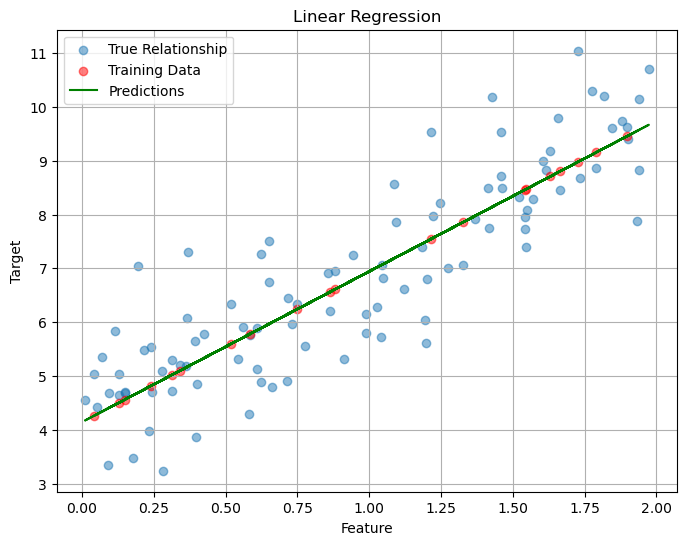

In [3]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R² score: {r2:.2f}")

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5)
plt.scatter(X_test, y_pred, color='red', alpha=0.5)
plt.plot(X, model.intercept_ + model.coef_ * X, color='green')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend(['True Relationship', 'Training Data', 'Predictions'])
plt.grid(True)
plt.show()

## Supervised Learning: Classification

Classification is used when we want to predict a categorical value. For example, classifying emails as spam or not spam.

Let's create a simple classification model:

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate some synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                          n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.95
Confusion Matrix:
[[10  1]
 [ 0  9]]


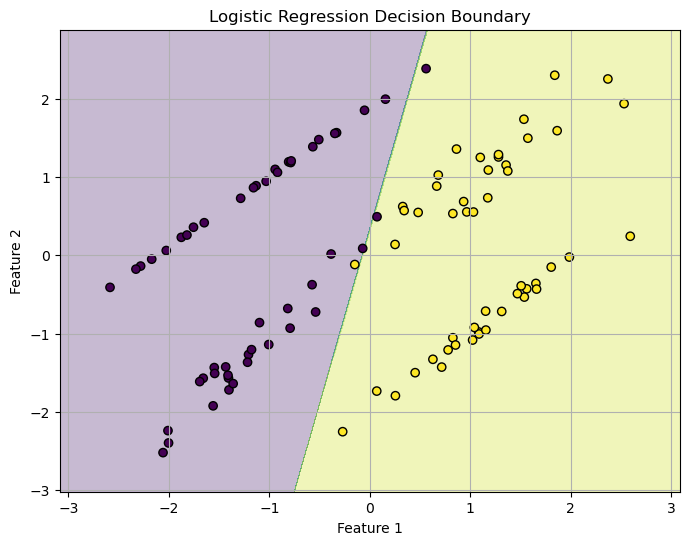

In [5]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    # Set min and max values with some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict for all points in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, clf, 'Logistic Regression Decision Boundary')

## Model Evaluation: Cross-Validation

In machine learning, it's important to evaluate how well our model generalizes to new, unseen data. Cross-validation is a technique that helps us do this.

In [6]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for our regression model
reg_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE
reg_mse_scores = -reg_scores
print(f"Regression MSE scores: {reg_mse_scores}")
print(f"Average MSE: {reg_mse_scores.mean():.2f}")

# Perform 5-fold cross-validation for our classification model
clf_scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print(f"Classification accuracy scores: {clf_scores}")
print(f"Average accuracy: {clf_scores.mean():.2f}")

Regression MSE scores: [0.07549981 0.06964316 0.0507185  0.03695018 0.03768476]
Average MSE: 0.05
Classification accuracy scores: [0.9  0.95 1.   1.   1.  ]
Average accuracy: 0.97


## Underfitting and Overfitting

Two common problems in machine learning are underfitting and overfitting:

1. **Underfitting**: The model is too simple to capture the underlying pattern in the data.
2. **Overfitting**: The model is too complex and captures noise in the data rather than just the underlying pattern.

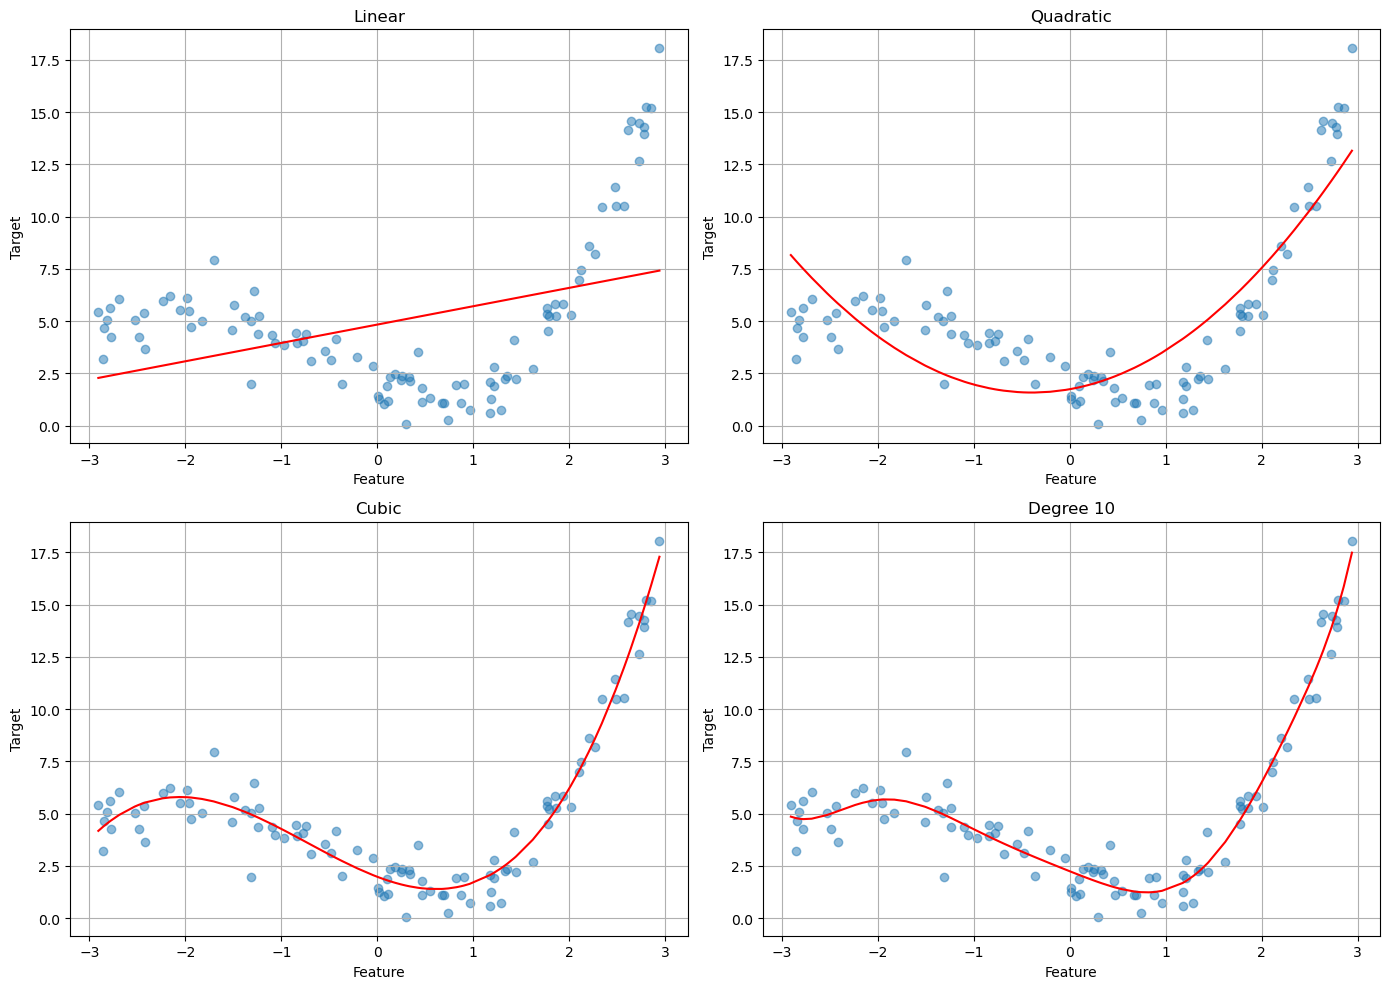

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Generate some non-linear data
X = np.sort(np.random.rand(100, 1) * 6 - 3)
y = 0.5 * X**3 + X**2 - 2 * X + 2 + np.random.randn(100, 1)

# Create models of different complexity
models = [
    ('Linear', Pipeline([
        ('poly', PolynomialFeatures(degree=1)),
        ('linear', LinearRegression())
    ])),
    ('Quadratic', Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ])),
    ('Cubic', Pipeline([
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression())
    ])),
    ('Degree 10', Pipeline([
        ('poly', PolynomialFeatures(degree=10)),
        ('linear', LinearRegression())
    ]))
]

# Fit and plot each model
plt.figure(figsize=(14, 10))
for i, (name, model) in enumerate(models):
    model.fit(X, y)
    y_pred = model.predict(X)
    
    plt.subplot(2, 2, i+1)
    plt.scatter(X, y, alpha=0.5)
    plt.plot(np.sort(X, axis=0), y_pred[np.argsort(X.flatten())], color='red')
    plt.title(name)
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.grid(True)

plt.tight_layout()
plt.show()

As you can see:
- The linear model is too simple (underfitting)
- The cubic model fits well (good fit)
- The degree 10 model is too complex and captures noise (overfitting)

## Conclusion

This was a brief introduction to machine learning basics. We covered:

1. Types of machine learning
2. Supervised learning: regression and classification
3. Model evaluation with cross-validation
4. Underfitting and overfitting

In practice, machine learning involves many more steps like feature engineering, hyperparameter tuning, and handling imbalanced datasets.